In [ ]:
pip install ipynb

In [ ]:
# pip install ipynb
# import ipynb
# this code need for use import funchion from file .ipynb

In [ ]:
import pandas as pd
import os
import ipynb

In [ ]:
# log into Google Disk for Google Colab/ if you use file on ssd on your computer, this code removes
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# set default folder for python
import sys
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

Mounted at /content/drive


In [ ]:
# search for the best parameter using a for
# for lstm in [200]:
#   for dropout in [0.3, 0.2]:
#     for dense in [512, 1024, 2000]:
#       for batch_size in [250, 500]:
#         for min_delta in [0.001]:
#           predict_calculate(lstm, dropout, dense, batch_size, min_delta, parametr_save = False, epochs = 100)

In [ ]:
data_result = pd.read_csv('result1.csv')
data_result = data_result.drop(data_result.columns[[0]], axis=1)

best_result = data_result.loc[data_result['Minimum_Validation_Loss'].idxmin()] # selection of the best result machine learning from a file by parameter Minimum_Validation_Loss

In [ ]:
from ipynb.fs.full.ML_1_0 import predict_calculate

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directory_model = 'best_model_1' # adress directory load model machine learning
# you can use checpoint model for example training_step_1/cp-0024.ckpt

21/21 [==============================] - 52s 2s/step - loss: 5.1642 - val_loss: 37.8900

Minimum Loss: 5.1642
Minimum Validation Loss: 37.8900
4/4 [==============================] - 3s 678ms/step - loss: 37.8900

MAE train_ds: 5.132358074188232
MAE val_ds: 37.890010833740234 

Time to complete (h:m): 0:01


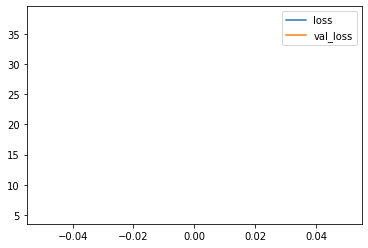

In [ ]:
best_model = predict_calculate(best_result['LSTM'],
                               best_result['Dropout'],
                               best_result['Dense'],
                               best_result['Batch_size'],
                               best_result['Min_delta'],
                               parametr_save = False, # If you need to save a machine learning model and calculation result choose True
                               epochs = 1,
                               checkpoint_use = False, # If you need to use checkpoint save a machine learning model choose True
                               use_load_model = False,
                               directory_model = directory_model) # If you need to use load a machine learning model choose True